In [1]:
from google.colab import files

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv('aug_train.csv')

In [6]:
train_data.shape

(19158, 14)

In [7]:
train_data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0




---


# Checking Class Balance
Balanced dataset

---






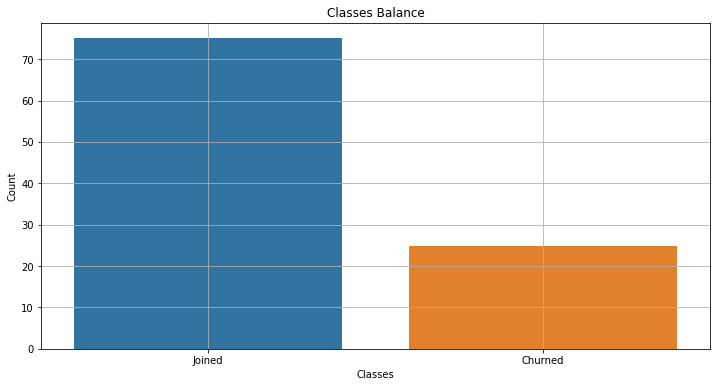

In [8]:
classes_percentage = (train_data['target'].value_counts()*100)/train_data.shape[0]
classes_percentage.index = ['Joined','Churned']
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(x = classes_percentage.index, y= classes_percentage)
plt.title("Classes Balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.grid()
plt.show()



---
# ***Exploratory Data Analysis***
---





In [9]:
train_data['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

# ***Checking the info of the dataset***

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# ***Sheer volume of the dataset comprises of categorical variables, and only the categorical variables have missing values. So imputing them could be hard because the percentage of missing values in them is high***



---
EDA on training hours, the idea is to check the interest of samples spread across different levels under each categorical feature.

EG: (Enrolled University [Categorical Ordinal Feature] : Describes the level of education of a candidate.

No of levels = 5 levels


level =  {school, graduate, PHD, Maters, primary school}) 


So say for instance if there is a huge variablity in the box plots of the levels of enrolled university, then we raise the question why and analyze based on that inspection. 

---





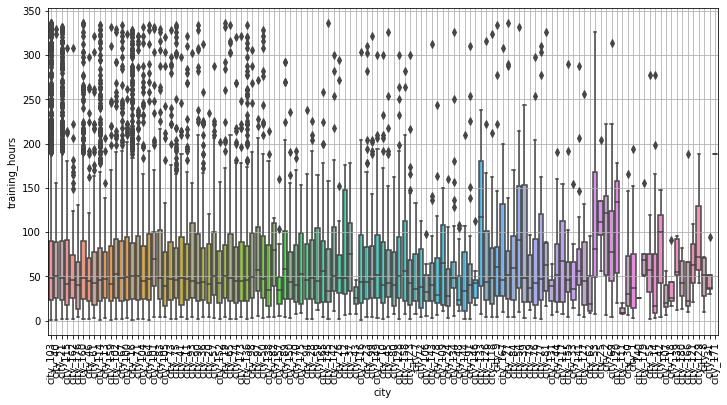

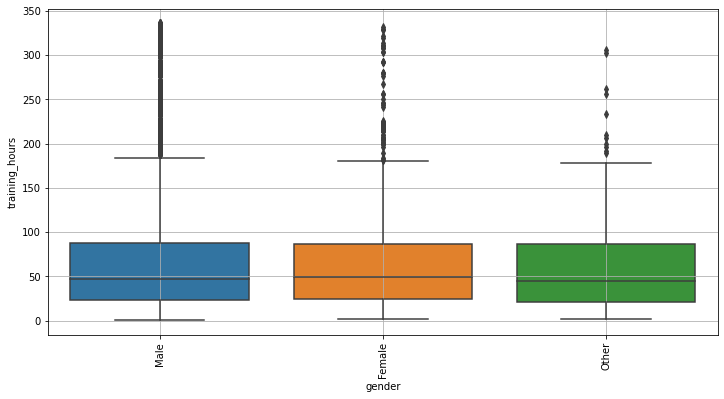

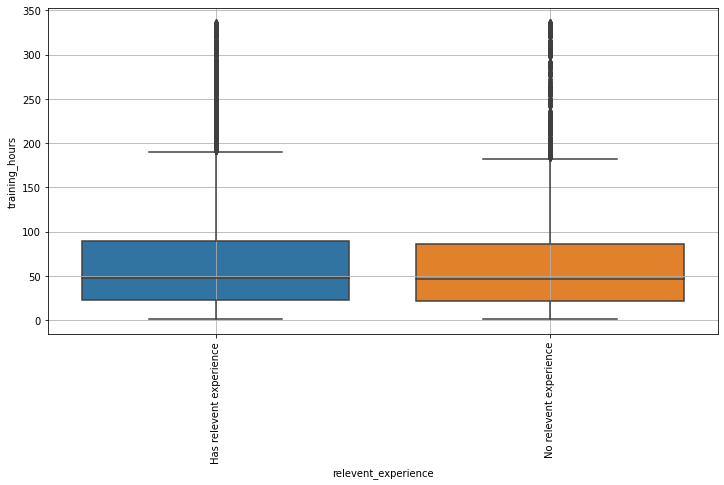

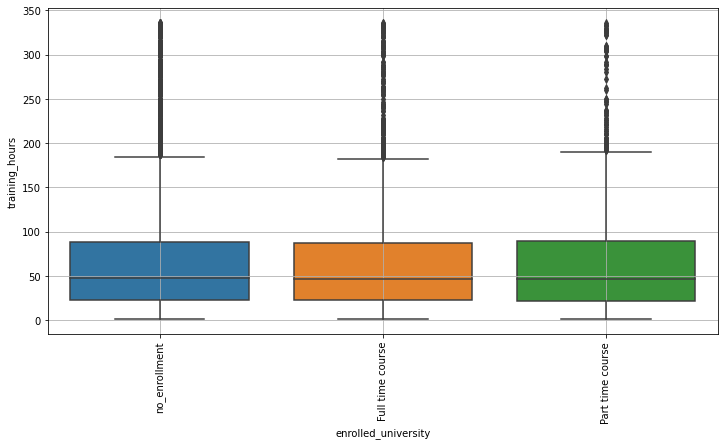

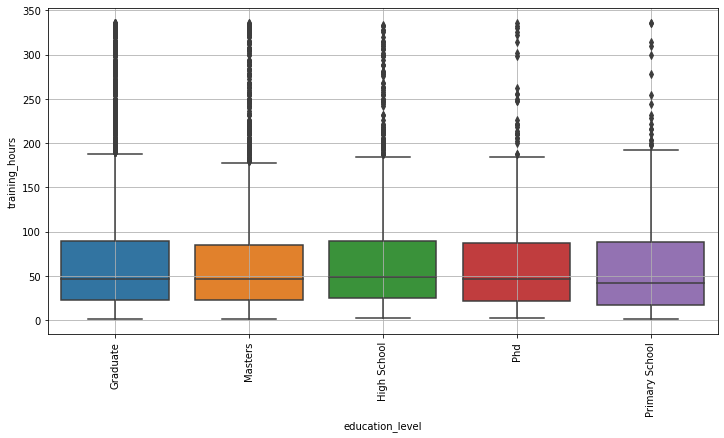

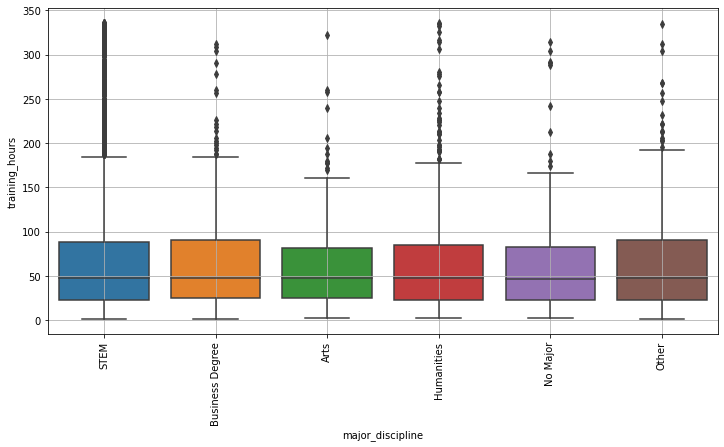

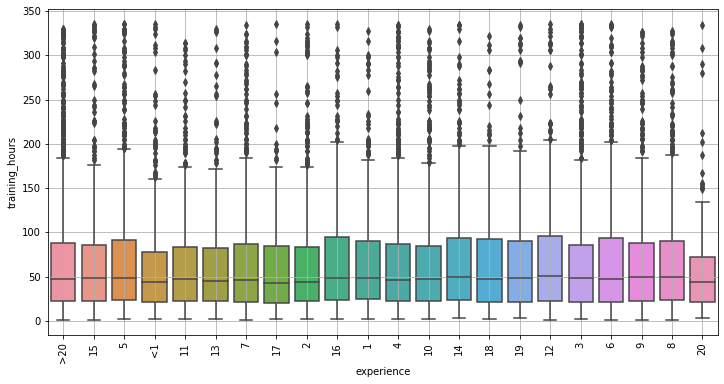

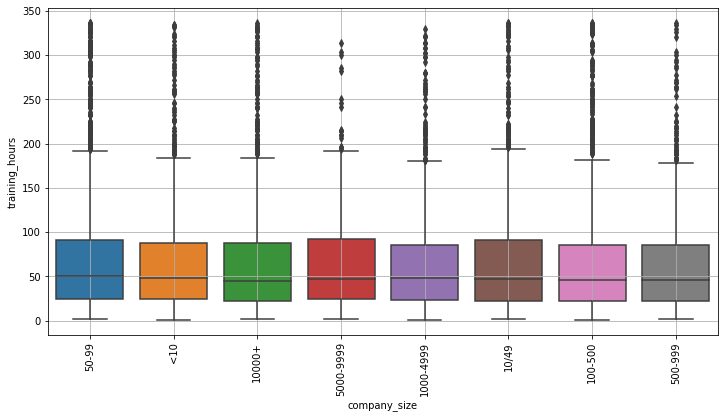

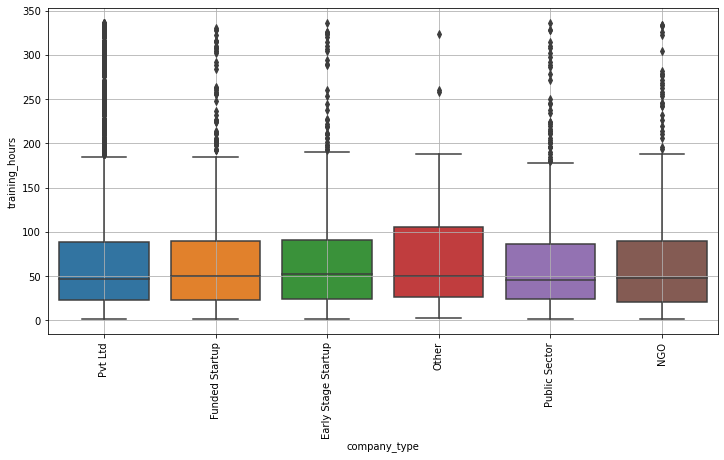

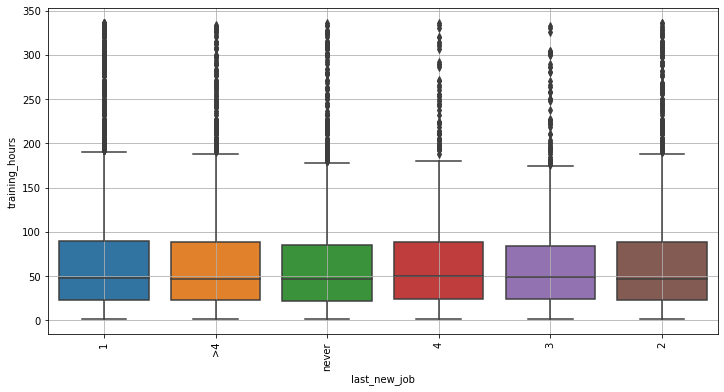

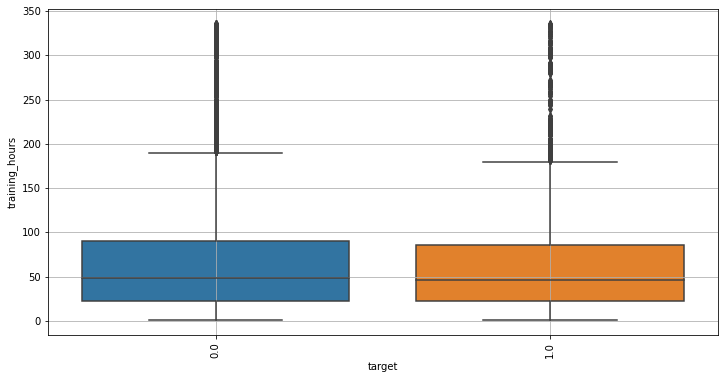

In [11]:
for i in train_data.drop(['enrollee_id','city_development_index','training_hours'], axis = 1).columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(x = i, y = 'training_hours', data = train_data);
  plt.xticks(rotation = 90)
  plt.grid()
  plt.show()

In [12]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


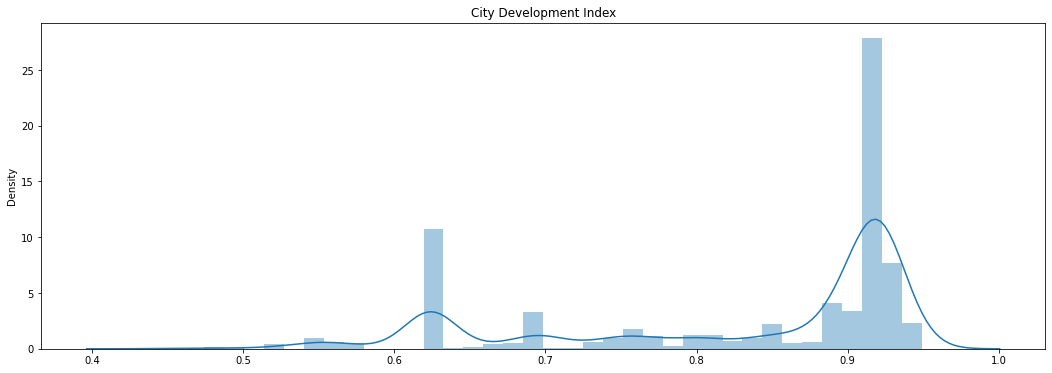

In [13]:
plt.figure(figsize =(18,6))
sns.distplot(x = train_data['city_development_index']);
plt.title('City Development Index')
plt.show()

In [ ]:
train_data.head()

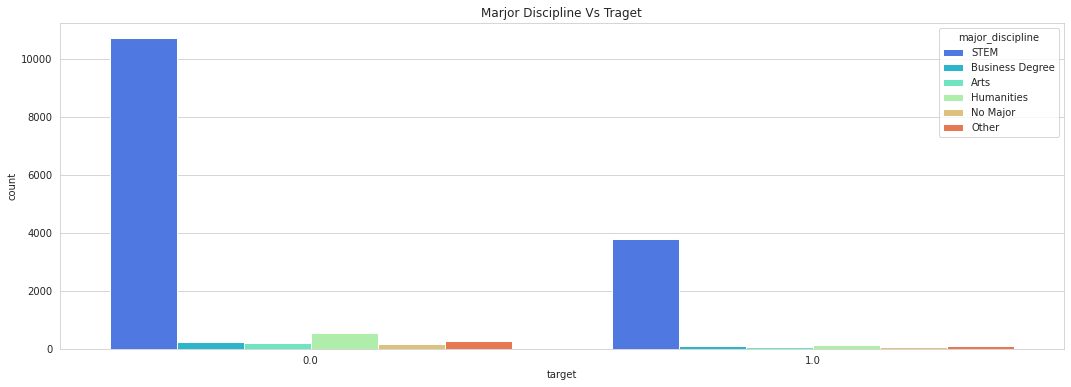

In [14]:
plt.figure(figsize = (18,6))
sns.set_style('whitegrid')
sns.countplot(x='target',hue='major_discipline',data=train_data,palette='rainbow');
plt.title("Marjor Discipline Vs Traget")
plt.show()

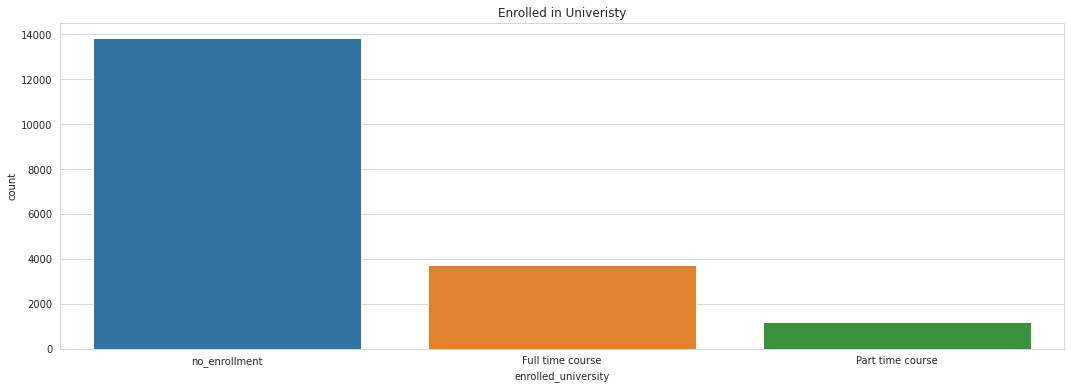

In [15]:
train_data['enrolled_university'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = 'enrolled_university', data = train_data)
plt.title("Enrolled in Univeristy")
plt.show()

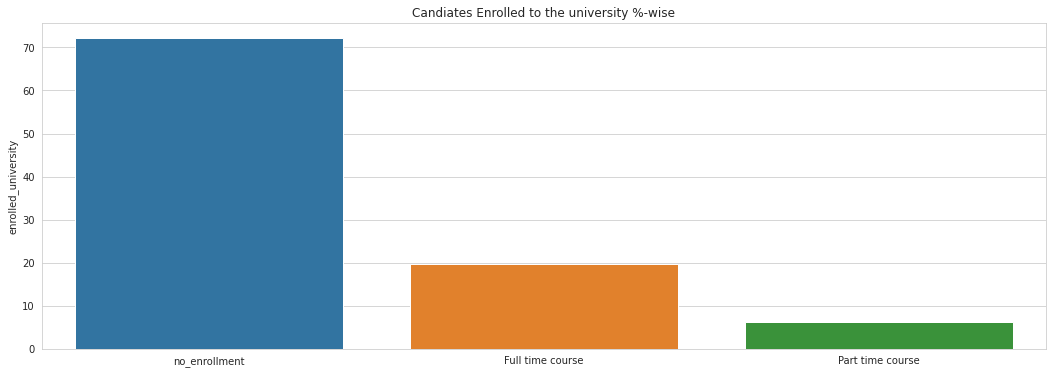

In [16]:
# percentage wise split up
plt.figure(figsize = (18,6))
c = (train_data['enrolled_university'].value_counts()*100) /train_data.shape[0]
sns.barplot(x =c.index , y = c)
plt.title("Candiates Enrolled to the university %-wise")
plt.show()

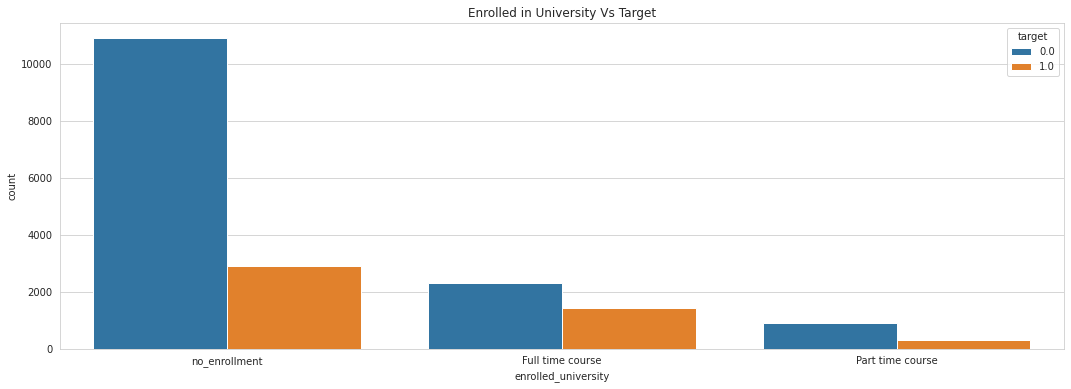

In [17]:
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['enrolled_university'], hue = train_data['target'], data = train_data)
plt.title("Enrolled in University Vs Target")
plt.show()

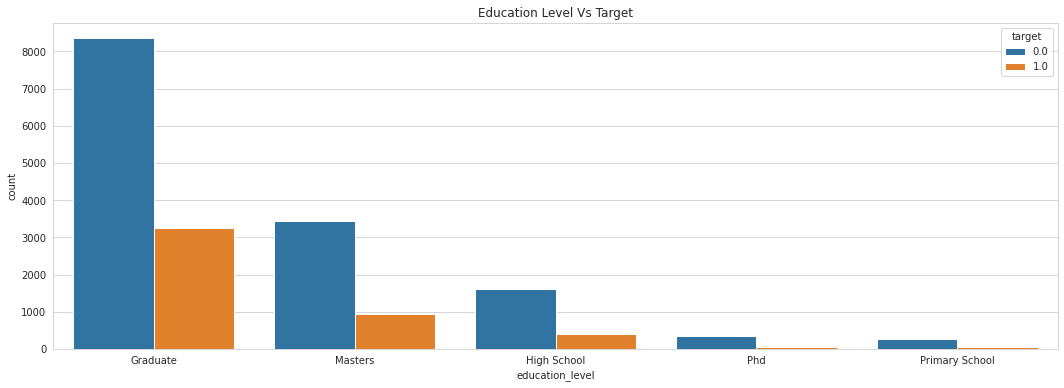

In [18]:
# Education level
train_data['education_level'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['education_level'], hue = train_data['target'], data = train_data)
plt.title("Education Level Vs Target")
plt.show()

In [19]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


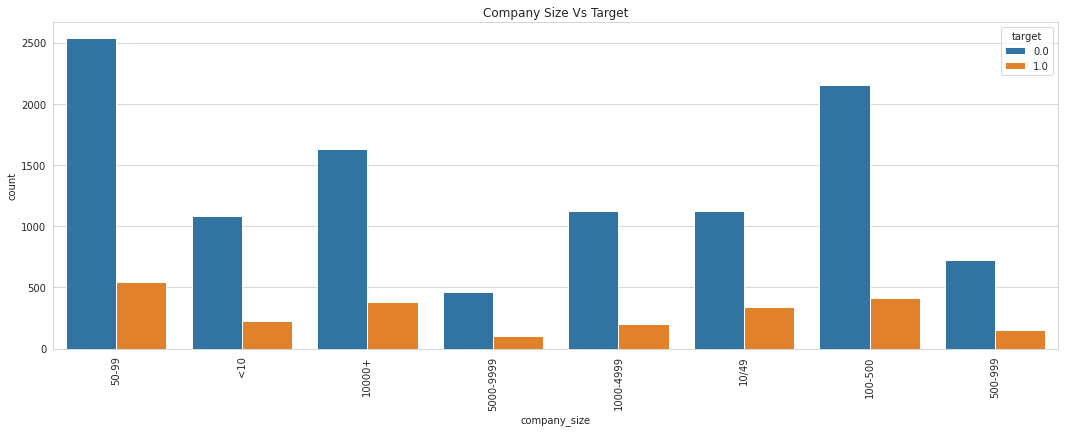

In [20]:
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['company_size'], hue = train_data['target'], data = train_data)
plt.title('Company Size Vs Target')
plt.xticks(rotation = 90)
plt.show()

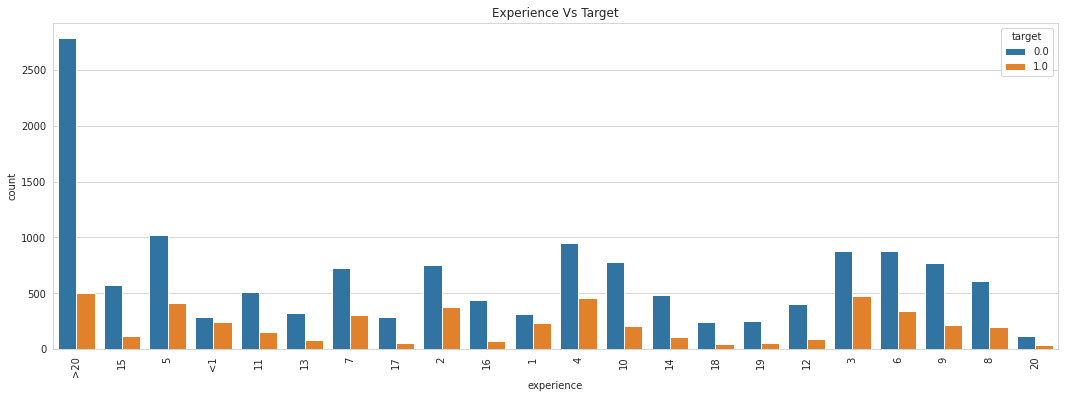

In [21]:
train_data['experience'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['experience'], hue = train_data['target'], data = train_data)
plt.title('Experience Vs Target')
plt.xticks(rotation = 90)
plt.show()

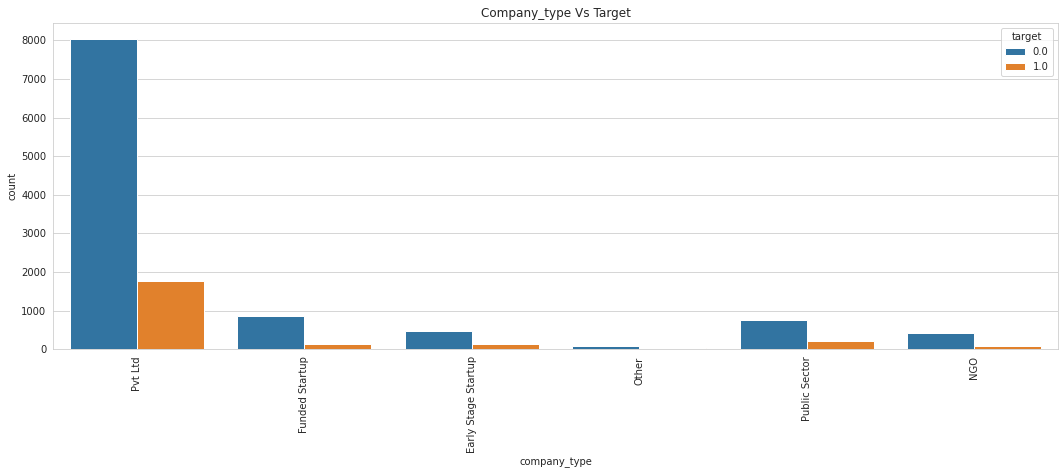

In [22]:
train_data['company_type'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['company_type'], hue = train_data['target'], data = train_data)
plt.title('Company_type Vs Target')
plt.xticks(rotation = 90)
plt.show()

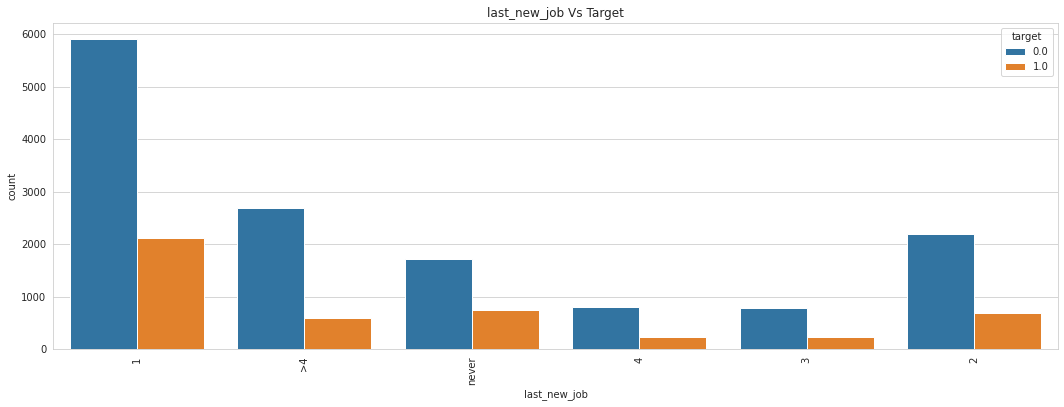

In [23]:
train_data['last_new_job'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['last_new_job'], hue = train_data['target'], data = train_data)
plt.title('last_new_job Vs Target')
plt.xticks(rotation = 90)
plt.show()

# ***Featrure selection -- Using Bivariate Analysis***

In [53]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [54]:
# Sperating all the cateegorical features
Objects = train_data.select_dtypes(include = [np.object])

In [55]:
Objects.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [58]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

categorical_dependencies = {}

for i in Objects.columns:
  x = pd.crosstab(train_data[i], train_data['target'])
  stat, p, dof, expected = chi2_contingency(x)
  alpha = 0.05
  if(p <= alpha):
    categorical_dependencies[i] = 'Dependent'
  else:
    categorical_dependencies[i] = 'Independent'  

From the dictionary categorical_dependencies we can say that all the categorical variables are dependent on the target variable.

In [60]:
categorical_dependencies

{'city': 'Dependent',
 'company_size': 'Dependent',
 'company_type': 'Independent',
 'education_level': 'Dependent',
 'enrolled_university': 'Dependent',
 'experience': 'Dependent',
 'gender': 'Independent',
 'last_new_job': 'Dependent',
 'major_discipline': 'Dependent',
 'relevent_experience': 'Dependent'}

In [61]:
# Sepearting all the numerical columns
Numerical = train_data.select_dtypes(include = [np.number])

In [63]:
Numerical.columns

Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')

In [62]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
mod = ols('training_hours ~ target', data = train_data).fit()
anova = sm.stats.anova_lm(mod,type = 1)

In [66]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,5.218413e+03,5218.412864,1.438337,0.23044
Residual,8953.0,3.248227e+07,3628.088050,NaN,NaN


In [ ]:
# Inference, Training hours doesn't have an inpact on the candiate joining or leaving the company after the course. 

In [69]:
mod = ols('city_development_index ~ target', data = train_data).fit()
anova = sm.stats.anova_lm(mod,type = 1)

In [70]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,21.532223,21.532223,1940.926728,0.0
Residual,8953.0,99.322655,0.011094,NaN,NaN


In [ ]:
# Inference, City development index does have an inpact on the candiate joining or leaving the company after the course.
# A city like banglore will have a better development index compared to a city like Patna, so more opportunities thus the candidate is more likely to churn. 

# ***Preprocessing***

In [25]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [27]:
# Since all the data we have here are not categorical, imputing it is nearly impossible.
# And wrong imputation might lead to fradulent data. 
# Eventually it gives a bad impact on the model
# Thus i'll drop the null values
train_data.dropna(inplace = True)

Creating a new dataset for the modeling. It's always a good practice to keep the orginal data untouched. 

In [30]:
ml_df = train_data.drop('enrollee_id', axis =1).copy()



---
# one Hot Encoding

### I'm one hot encoding all the Qualitative Nominal features, and the bianary featuers, Since I'm using the drop first variant it serves the purpose.
---





In [31]:
ml_df = pd.get_dummies(ml_df, columns=['gender'],prefix='gender',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['relevent_experience'],prefix='relevent_experience',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['enrolled_university'],prefix='enrolled_university',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['major_discipline'],prefix='major_discipline',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['company_type'],prefix='company_type',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['last_new_job'],prefix='last_new_job',drop_first=True)




---


# Lable Enconding 

I'm lable encoding ordinal features, using .cat.codes



---






In [32]:
ml_df.education_level.unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [33]:
ml_df['education_level'].replace({'Graduate':0,'Masters':1, 'PhD':2}, inplace = True)

In [34]:
ml_df['education_level'] = ml_df['education_level'].astype('category')
ml_df['education_level'] = ml_df['education_level'].cat.codes

In [35]:
ml_df.experience.unique()

array(['15', '>20', '13', '7', '5', '16', '11', '<1', '18', '19', '12',
       '10', '9', '2', '6', '4', '14', '3', '8', '17', '20', '1'],
      dtype=object)

In [36]:
ml_df['experience'].replace({'<1':'0','>20':'20'}, inplace = True)

In [37]:
 ml_df['experience'] = ml_df['experience'].astype('category')
 ml_df['experience'] = ml_df['experience'].cat.codes

In [38]:
ml_df.company_size.unique()

array(['50-99', '<10', '5000-9999', '1000-4999', '10/49', '100-500',
       '10000+', '500-999'], dtype=object)

In [39]:
ml_df['company_size'].replace({'50-99':'2', '<10':'0', '5000-9999':'6', '1000-4999':'5', '10/49':'1', '100-500':'3','10000+':'7', '500-999':'4'}, inplace = True)

In [40]:
 ml_df['company_size'] = ml_df['company_size'].astype('category')
 ml_df['company_size'] = ml_df['company_size'].cat.codes

In [41]:
ml_df.shape

(8955, 27)

In [42]:
ml_df['city'] = ml_df['city'].astype('category')
ml_df['city'] = ml_df['city'].cat.codes

In [43]:
ml_df.head()

,city,city_development_index,education_level,experience,company_size,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,72,0.776,0,7,2,47,0.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,48,0.767,1,13,2,8,0.0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
7,78,0.762,0,5,0,18,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
8,5,0.920,0,18,2,46,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
11,5,0.920,0,16,6,108,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0



---
# Creating the Dependent and Independent variables


---

---






In [96]:
X = ml_df.drop('target', axis =1)
y = ml_df['target']



---
# Preforming the Train Test Split


---



In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [99]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(6716, 26)
(2239, 26)
(6716,)
(2239,)





---




# Building the ML model

---



In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [100]:
#X_train = X_train.drop('training_hours', axis = 1)
#X_test = X_test.drop('training_hours', axis = 1)

# There is a dip in the accuracy if training hours is removed, May be it's contributing on an interaction level

In [101]:
# Sacling the dataset

In [102]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [103]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
preds = lr.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [106]:
confusion_matrix(y_test,preds)

array([[1820,   61],
       [ 272,   86]])

In [107]:
accuracy_score(y_test,preds)

0.8512728896828942

In [ ]:
# The logistic Regression Model gives us 85% accuracy, but very low recall, let's try other models to get a generalized type 1 and type 2 error.

# ***Support Vector Machine Model***

In [108]:
from sklearn.svm import SVC

In [113]:
svc_classifier = SVC(C=2.0)

In [114]:
svc_classifier.fit(X_train, y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
svm_preds = svc_classifier.predict(X_test)

In [116]:
confusion_matrix(svm_preds,y_test)

array([[1786,  229],
       [  95,  129]])

In [117]:
accuracy_score(svm_preds, y_test)

0.8552925413130862

The SVM model is better than the LG model, but this has a precision issue. Trying a kernal SVM model

In [119]:
svc_kernal =  SVC(kernel= 'rbf', C=3, gamma = 0.1)

In [120]:
svc_kernal.fit(X_train,y_train)
preds = svc_kernal.predict(X_test)

In [121]:
confusion_matrix(preds,y_test)

array([[1771,  238],
       [ 110,  120]])

In [122]:
accuracy_score(preds, y_test)

0.8445734702992407

## ***Building the ANN model***

In [123]:
# ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [124]:
classifier = Sequential()

In [125]:
X_train.shape

(6716, 26)

In [126]:
classifier.add(Dense(units = 10, input_dim = 26, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 8, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 18, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 5, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units= 1, kernel_initializer='glorot_normal', activation= 'sigmoid'))
classifier.compile(optimizer='Adamax', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [127]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 18)                162       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 95        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [128]:
classifier.fit(X_train, y_train, validation_split= 0.28, epochs= 200, batch_size= 264)

Epoch 1/200
19/19 [==============================] - 1s 36ms/step - loss: 0.6987 - accuracy: 0.4760 - val_loss: 0.6542 - val_accuracy: 0.7283
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 0.6398 - accuracy: 0.7637 - val_loss: 0.6090 - val_accuracy: 0.8123
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.8193 - val_loss: 0.5639 - val_accuracy: 0.8214
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.8355 - val_loss: 0.5238 - val_accuracy: 0.8320
Epoch 5/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5158 - accuracy: 0.8304 - val_loss: 0.4924 - val_accuracy: 0.8304
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4867 - accuracy: 0.8308 - val_loss: 0.4682 - val_accuracy: 0.8299
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.8268 - val_loss: 0.4507 - val_accuracy: 0.8304
Epoch 8/200


In [129]:
preds = classifier.predict(X_test)

In [130]:
preds = (preds>0.5)

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [134]:
accuracy_score(preds, y_test)

0.8535060294774452

In [135]:
confusion_matrix(preds, y_test)

array([[1790,  237],
       [  91,  121]])

The Base ANN model has given 85% accuracy, let's try to perform some hyperparameter tuning

In [136]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 2.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=bc7abb3b7d66098264b177add210eb295311cdf8c1c80049e87a00cea4146146
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=000655f7cafe4f9dad9fba6f2c86cbf10b84bc3de36e8777d22e9ab092190efa
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [137]:
from kerastuner.tuners import RandomSearch

In [138]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [139]:
def build_model(hp):
    model = keras.Sequential()
    # hp.Int creates the hidden layers using 'num_layers'
    for i in range(hp.Int('num_layers', 1, 20)): 
        # Second Hyperparameter : Number of neurons we should have in each hidden layer
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,
                                            max_value=50,
                                            step=32),
                               activation=hp.Choice('activation_', ['relu','sigmoid','elu','tanh'])))
    model.add(layers.Dense(units = 1, kernel_initializer='glorot_normal' ,activation='sigmoid'))
    model.compile(
        # Third Hyperparameter: What should be the learning rate
        optimizer='Adamax',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

    #hp.Int - tires all options
    #hp.Choice - Chooses one out of the options

In [140]:
tuner = RandomSearch(
    # Hyperparameters passed
    build_model, 
    # Based on what you want to pick the best
    objective='val_accuracy',
    # Max trials
    max_trials=5,
    # Trails per execution
    executions_per_trial=5)

In [141]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 50, 'step': 32, 'sampling': None}
activation_ (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'elu', 'tanh'], 'ordered': False}


In [143]:
tuner.search(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))

In [ ]:
tuner.results_summary()

In [ ]:
X_train.shape

In [144]:
# Implementing the best results into a model
tuner_Classifier = Sequential()
tuner_Classifier.add(Dense(input_dim = 26, kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 5))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 1))
tuner_Classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [145]:
tuner_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 37)                999       
_________________________________________________________________
dense_6 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_7 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_8 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_9 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 190       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [146]:
tuner_Classifier.fit(X_train, y_train, validation_split= 0.25, epochs = 200, batch_size= 124)

Epoch 1/200
41/41 [==============================] - 1s 8ms/step - loss: 0.7405 - accuracy: 0.3702 - val_loss: 0.5434 - val_accuracy: 0.8297
Epoch 2/200
41/41 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.8315 - val_loss: 0.4809 - val_accuracy: 0.8297
Epoch 3/200
41/41 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8231 - val_loss: 0.4664 - val_accuracy: 0.8297
Epoch 4/200
41/41 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.8269 - val_loss: 0.4610 - val_accuracy: 0.8297
Epoch 5/200
41/41 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8250 - val_loss: 0.4587 - val_accuracy: 0.8297
Epoch 6/200
41/41 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8406 - val_loss: 0.4574 - val_accuracy: 0.8297
Epoch 7/200
41/41 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8369 - val_loss: 0.4570 - val_accuracy: 0.8297
Epoch 8/200
4

In [147]:
new_pred = tuner_Classifier.predict(X_test)

In [148]:
new_preds = (new_pred > 0.5)

In [149]:
confusion_matrix(new_preds, y_test)

array([[1773,  213],
       [ 108,  145]])

In [150]:
accuracy_score(new_preds, y_test)

0.8566324251898169

In [151]:
# We have sccessfully tweaked the test accuracy, 
# let's see what opportunities we have with respect to the cut of to tweak the model with respect to the precision and recall

In [177]:
# Optimal Cut-off finder

# Imports for Imbaku's Den
from sklearn.metrics import auc, roc_auc_score, roc_curve


# Plotter
def plot_roc_curve(fpr, tpr, cut_off):
    plt.figure(figsize = (10,5))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    s = ' '+cut_off
    plt.title('Receiver Operating Characteristic (ROC) Curve of the cut-off'+s)
    plt.legend()
    plt.show()
    print(auc(fpr, tpr), "is the Area Under the Curve")
    print('\n\n')

#fpr, tpr, thresh = roc_curve(y_test, preds)


tresh = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]

def The_Imbakus_Den(x , y_test, new_pred):

  from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

  tresh = x
  auc_4_tresh = {}
  roc_auc_curve_4_tresh = {}
  recall_4_tresh = {}
  precision_4_tresh = {}
  accuracy_4_tresh = {}
  f1_4_tresh = {}
  for i in tresh:
    y_preds = (new_pred > i)
    fpr, tpr, thresh = roc_curve(y_test, y_preds)
    roc_auc_curve_4_tresh[i] = roc_curve(y_test, y_preds)
    plot_roc_curve(fpr,tpr, str(i))
    auc_4_tresh[i] = auc(fpr,tpr)
    recall_4_tresh[i] = recall_score(y_preds, y_test)
    precision_4_tresh[i] = precision_score(y_preds, y_test)
    f1_4_tresh[i] = f1_score(y_preds, y_test)
    accuracy_4_tresh[i] = accuracy_score(y_preds, y_test)

  auc_4_thresh = pd.DataFrame(auc_4_tresh, index = ['AUC']).T
  accuracy_4_thresh = pd.DataFrame(accuracy_4_tresh, index = ['Accuracy']).T
  f1_score_4_thresh = pd.DataFrame(f1_4_tresh, index = ['f1_score']).T
  Precision_4_thresh = pd.DataFrame(precision_4_tresh, index = ['Precsion']).T
  Recall_4_thresh = pd.DataFrame(recall_4_tresh, index = ['Recall']).T

  for i in [auc_4_thresh, accuracy_4_thresh, f1_score_4_thresh, Precision_4_thresh, Recall_4_thresh]:
    plt.figure(figsize=(18,5))
    sns.barplot(x = i.index, y = i.iloc[:,0])
    plt.title(i.columns[0])
    plt.xlabel("Cut offs")
    plt.show()
    print("\n\n")

  return auc_4_thresh,accuracy_4_thresh,f1_score_4_thresh,Precision_4_thresh,Recall_4_thresh


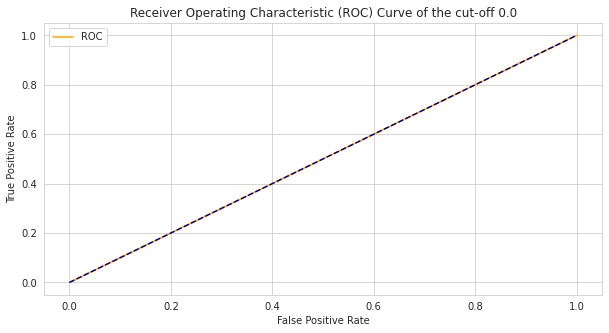

0.5 is the Area Under the Curve





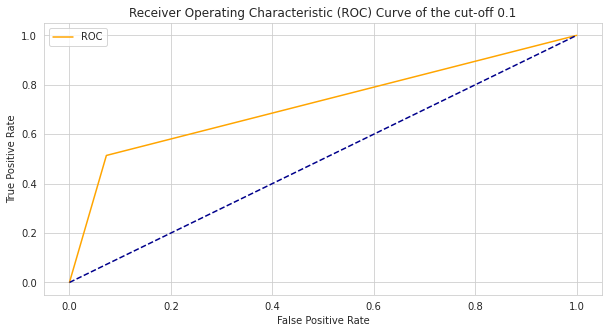

0.7205664406487695 is the Area Under the Curve





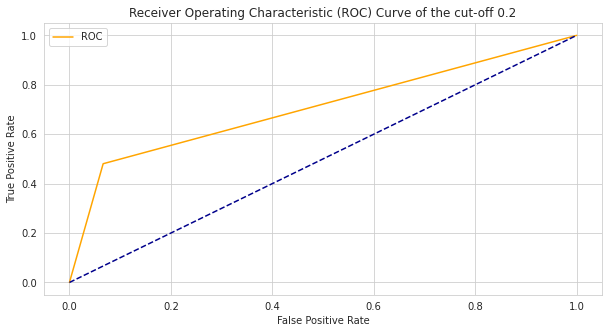

0.7069964567759335 is the Area Under the Curve





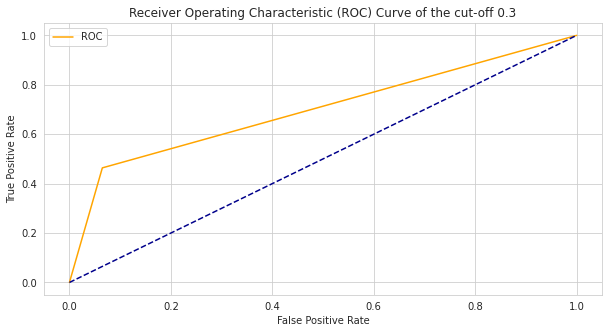

0.6994140166736463 is the Area Under the Curve





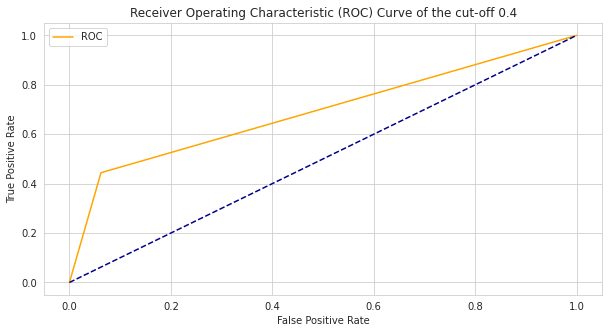

0.6909665606372457 is the Area Under the Curve





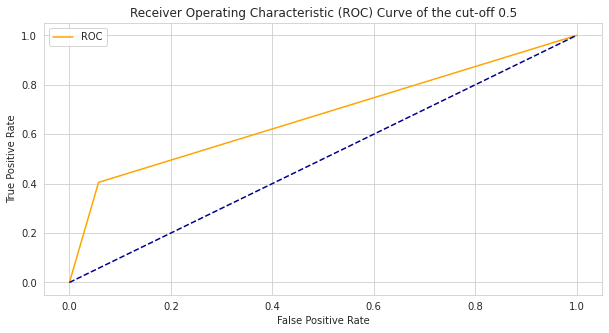

0.673805832509155 is the Area Under the Curve





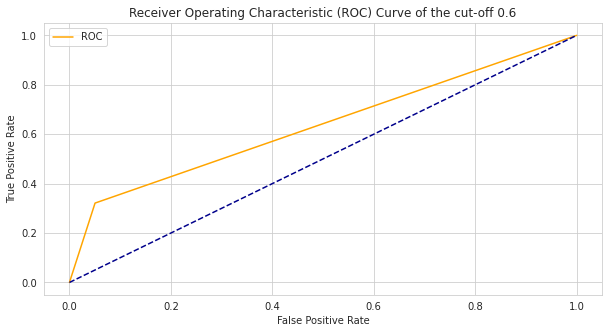

0.6353619998871396 is the Area Under the Curve





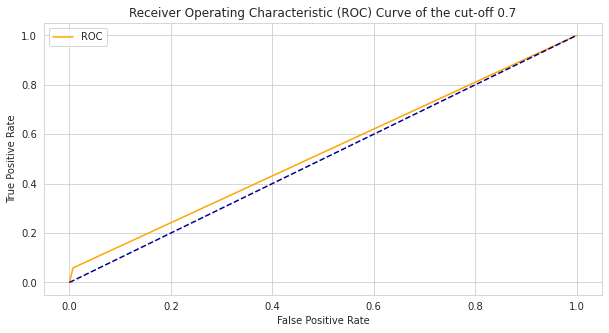

0.5258740002197809 is the Area Under the Curve





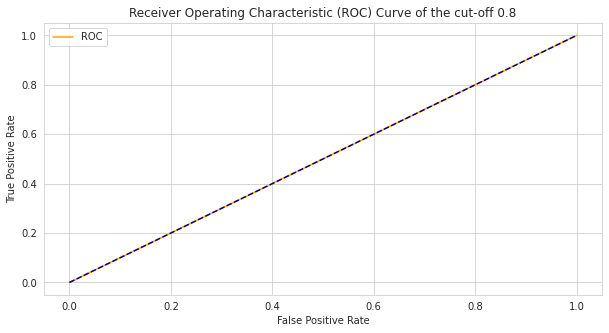

0.5 is the Area Under the Curve





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


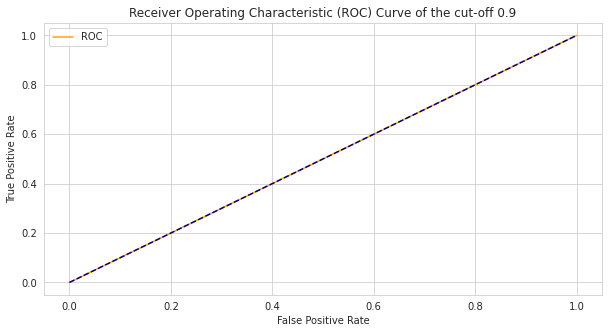

0.5 is the Area Under the Curve





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


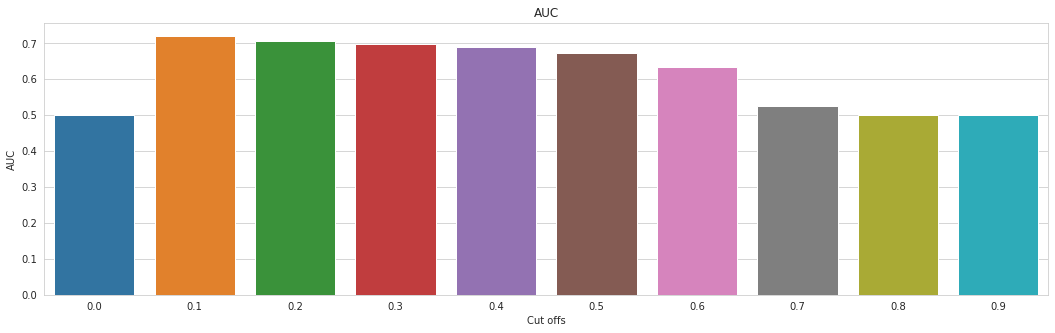

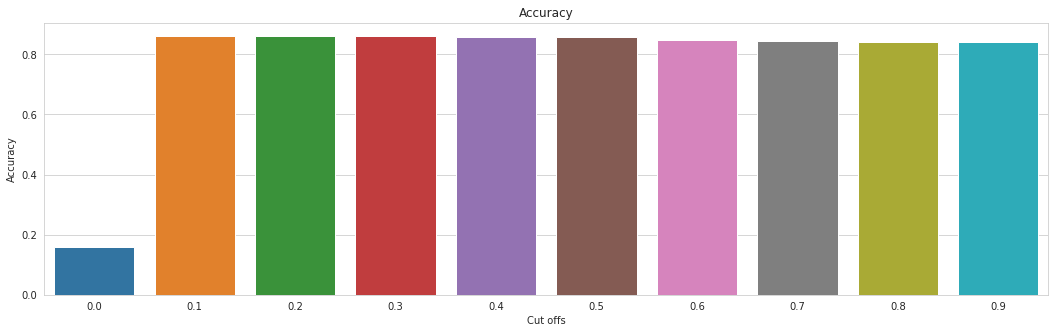

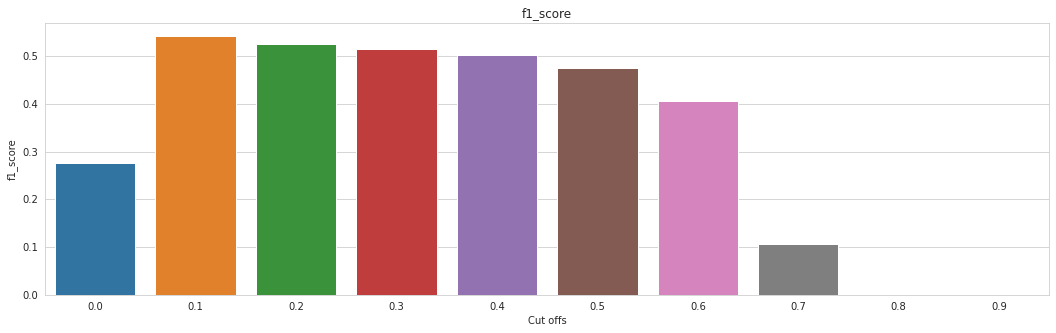

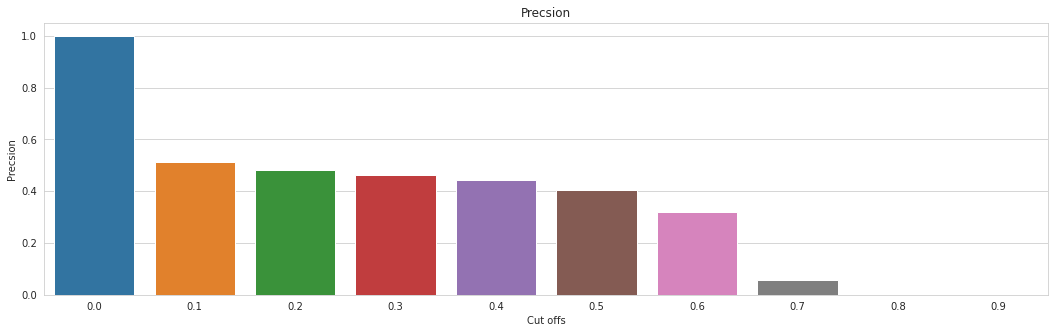

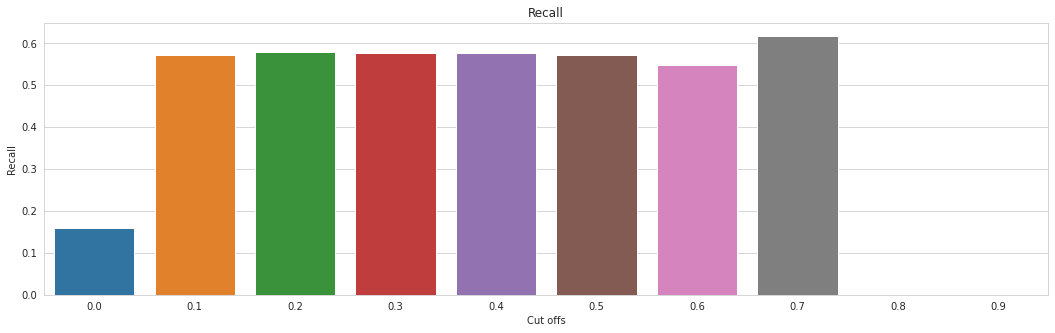

In [178]:
new_pred = tuner_Classifier.predict(X_test)
Auc, acc, f1, pres, rec = The_Imbakus_Den(tresh,y_test, new_pred)

In [180]:
Cut_off_wise_eval_df = pd.concat([Auc, acc, f1, pres, rec] , axis = 1)

In [181]:
Cut_off_wise_eval_df

,AUC,Accuracy,f1_score,Precsion,Recall
0.0,0.500000,0.159893,0.275703,1.000000,0.159893
0.1,0.720566,0.861099,0.541973,0.513966,0.573209
0.2,0.706996,0.861099,0.525191,0.480447,0.579125
0.3,0.699414,0.859759,0.513932,0.463687,0.576389
0.4,0.690967,0.858866,0.501577,0.444134,0.576087
0.5,0.673806,0.856632,0.474632,0.405028,0.573123
0.6,0.635362,0.849040,0.404930,0.321229,0.547619
0.7,0.525874,0.843680,0.107143,0.058659,0.617647
0.8,0.500000,0.840107,0.000000,0.000000,0.000000
0.9,0.500000,0.840107,0.000000,0.000000,0.000000


***# Now we can select the optimal cutt off as 0.1, since it give gives the best results on accuracy, f1_score, precision and recall***

In [182]:
new_preds = (new_pred > 0.1)

In [183]:
confusion_matrix(y_test, new_preds)

array([[1744,  137],
       [ 174,  184]])

In [184]:
fpr,tpr,thresh = roc_curve(y_test, new_preds)

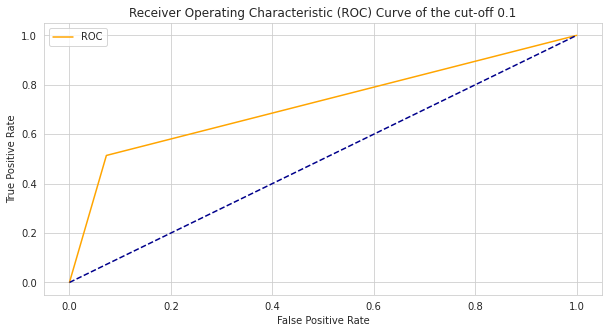

0.7205664406487695 is the Area Under the Curve





In [185]:
plot_roc_curve(fpr, tpr, '0.1')

In [190]:
# Predicting the test values using the mest model selected

# **Increasing the bandwidth of the training data to predict the real data**

In [192]:
new_X = np.concatenate([X_train, X_test])
new_y = np.concatenate([y_train, y_test])

In [194]:
tuner_Classifier.fit(new_X, new_y,  validation_split= 0.25, epochs = 200, batch_size= 124)

Epoch 1/200
55/55 [==============================] - 1s 7ms/step - loss: 0.3577 - accuracy: 0.8679 - val_loss: 0.3648 - val_accuracy: 0.8571
Epoch 2/200
55/55 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.8678 - val_loss: 0.3645 - val_accuracy: 0.8593
Epoch 3/200
55/55 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8673 - val_loss: 0.3647 - val_accuracy: 0.8584
Epoch 4/200
55/55 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8684 - val_loss: 0.3649 - val_accuracy: 0.8584
Epoch 5/200
55/55 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8682 - val_loss: 0.3632 - val_accuracy: 0.8598
Epoch 6/200
55/55 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8687 - val_loss: 0.3631 - val_accuracy: 0.8598
Epoch 7/200
55/55 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8690 - val_loss: 0.3633 - val_accuracy: 0.8598
Epoch 8/200
5

In [197]:
test_dataset = pd.read_csv('aug_test.csv')

In [199]:
# Preprocessing the test data
ml_df_t = test_dataset.copy()

In [200]:

ml_df_t = pd.get_dummies(ml_df_t, columns=['gender'],prefix='gender',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['relevent_experience'],prefix='relevent_experience',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['enrolled_university'],prefix='enrolled_university',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['major_discipline'],prefix='major_discipline',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['company_type'],prefix='company_type',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['last_new_job'],prefix='last_new_job',drop_first=True)

In [202]:
ml_df_t['education_level'].replace({'Graduate':0,'Masters':1, 'PhD':2}, inplace = True)
ml_df_t['education_level'] = ml_df_t['education_level'].astype('category')
ml_df_t['education_level'] = ml_df_t['education_level'].cat.codes

In [207]:
ml_df_t['experience'].replace({'<1':'0','>20':'20'}, inplace = True)
ml_df_t['experience'] = ml_df_t['experience'].astype('category')
ml_df_t['experience'] = ml_df_t['experience'].cat.codes

In [208]:
ml_df_t['company_size'].replace({'50-99':'2', '<10':'0', '5000-9999':'6', '1000-4999':'5', '10/49':'1', '100-500':'3','10000+':'7', '500-999':'4'}, inplace = True)
ml_df_t['company_size'] = ml_df_t['company_size'].astype('category')
ml_df_t['company_size'] = ml_df_t['company_size'].cat.codes

In [210]:
ml_df_t['city'] = ml_df_t['city'].astype('category')
ml_df_t['city'] = ml_df_t['city'].cat.codes

In [221]:
ml_df_t.drop('enrollee_id', axis = 1, inplace = True)

In [222]:
test = ss.transform(ml_df_t)

In [223]:
final_preds = tuner_Classifier.predict(test)
final_preds = (final_preds > 0.1)

In [239]:
Submission = pd.concat([test_dataset['enrollee_id'], pd.DataFrame(final_preds, columns=['Target'])], axis = 1)

In [240]:
Submission

,enrollee_id,Target
0,32403,False
1,9858,False
2,31806,True
3,27385,False
4,27724,False
...,...,...
2124,1289,False
2125,195,False
2126,31762,False
2127,7873,False
